In [4]:
!gdown --id 1LoyiM9bQlrullvtoPA7X4FWhNDBGPnED
!unzip /content/data_preprocessed_python.zip -d data_preprocessed_python


Downloading...
From: https://drive.google.com/uc?id=1LoyiM9bQlrullvtoPA7X4FWhNDBGPnED
To: /content/data_preprocessed_python.zip
100% 3.30G/3.30G [00:48<00:00, 68.8MB/s]
Archive:  /content/data_preprocessed_python.zip
 extracting: data_preprocessed_python/s01.dat  
 extracting: data_preprocessed_python/s02.dat  
 extracting: data_preprocessed_python/s03.dat  
 extracting: data_preprocessed_python/s04.dat  
 extracting: data_preprocessed_python/s05.dat  
 extracting: data_preprocessed_python/s06.dat  
 extracting: data_preprocessed_python/s07.dat  
 extracting: data_preprocessed_python/s08.dat  
 extracting: data_preprocessed_python/s09.dat  
 extracting: data_preprocessed_python/s10.dat  
 extracting: data_preprocessed_python/s11.dat  
 extracting: data_preprocessed_python/s12.dat  
 extracting: data_preprocessed_python/s13.dat  
 extracting: data_preprocessed_python/s14.dat  
 extracting: data_preprocessed_python/s15.dat  
 extracting: data_preprocessed_python/s16.dat  
 extracting: da

In [5]:
import os
from glob import glob
import pickle
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [6]:
FOLDER_PATH = '/content/data_preprocessed_python/'
files_list = sorted(glob(FOLDER_PATH + '*'))


In [7]:
dictionary_list = []
full_data = np.zeros((32,40,40,8064))
full_labels = np.zeros((32,40,4))
for i, f in (enumerate(tqdm(files_list))):
      with open(f, 'rb') as f: 
        content = pickle.load(f, encoding='iso-8859-1')
        data = content['data']
        labels = content['labels']
        full_data[i] = data
        full_labels[i] = labels
        


100%|██████████| 32/32 [01:20<00:00,  2.53s/it]


In [8]:
full_data.shape

(32, 40, 40, 8064)

In [9]:
full_labels.shape

(32, 40, 4)

In [64]:
full_labels[0,0:5]

array([[7.71, 7.6 , 6.9 , 7.83],
       [8.1 , 7.31, 7.28, 8.47],
       [8.58, 7.54, 9.  , 7.08],
       [4.94, 6.01, 6.12, 8.06],
       [6.96, 3.92, 7.19, 6.05]])

In [10]:
reshaped = full_data.reshape(-1,40,8064)
reshaped.shape

(1280, 40, 8064)

In [11]:
!gdown --id 1bee9Q-HN8jx_4XnwqFj_2wxNtd1GBcSm

Downloading...
From: https://drive.google.com/uc?id=1bee9Q-HN8jx_4XnwqFj_2wxNtd1GBcSm
To: /content/EEGModels.py
100% 18.0k/18.0k [00:00<00:00, 15.4MB/s]


In [13]:
from EEGModels import EEGNet, ShallowConvNet, DeepConvNet

In [14]:
full_labels.shape
full_labels_binary = np.where(full_labels > 5, 1, 0)


In [15]:
print(full_labels.shape)
print(full_labels_binary.shape)
print(full_labels[1][1])
print(full_labels_binary[1][1])
unique, counts = np.unique(full_labels_binary, return_counts=True)
print (np.asarray((unique, counts)).T)

(32, 40, 4)
(32, 40, 4)
[8.01 7.1  8.04 8.08]
[1 1 1 1]
[[   0 2044]
 [   1 3076]]


In [16]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train,y_test = train_test_split(full_data,full_labels_binary,train_size = 0.8)

In [17]:
full_dataEEG = full_data[:,:,:32]
full_dataEEG = full_dataEEG.reshape(-1,32,8064,1)

data_size = 1028 

small_dataEEG = full_dataEEG[:data_size]
small_dataEEG.shape

(1028, 32, 8064, 1)

In [18]:
full_labels_valence = full_labels_binary[:,:,0]
small_labels_valence = full_labels_valence.reshape(-1,1)
small_labels_valence = small_labels_valence[:data_size]
small_labels_valence.shape

(1028, 1)

In [20]:
model  = EEGNet(nb_classes = 2, Chans = 32, Samples = 8064)

In [21]:
import tensorflow as tf
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer= optimizer,loss = 'SparseCategoricalCrossentropy')

In [ ]:
import keras
history = model.fit(small_dataEEG, small_labels_valence, batch_size=2, epochs = 100,verbose = 1)

In [24]:
loss = history.history['loss']

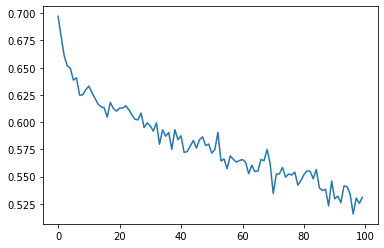

In [25]:
plt.plot(range(len(loss)),loss)

In [51]:
model.save('/content/modelvalence100')

INFO:tensorflow:Assets written to: /content/modelvalence100/assets


In [53]:
!zip -r /content/modelvalence100.zip /content/modelvalence100

  adding: content/modelvalence100/ (stored 0%)
  adding: content/modelvalence100/saved_model.pb (deflated 90%)
  adding: content/modelvalence100/keras_metadata.pb (deflated 92%)
  adding: content/modelvalence100/variables/ (stored 0%)
  adding: content/modelvalence100/variables/variables.data-00000-of-00001 (deflated 24%)
  adding: content/modelvalence100/variables/variables.index (deflated 69%)
  adding: content/modelvalence100/assets/ (stored 0%)


In [56]:
from tensorflow import keras
valence = keras.models.load_model('/content/modelvalence100')

In [49]:
predicted = (model2.predict(small_dataEEG))
predicted = np.argmax(predicted, axis = 1)
predicted = predicted.reshape(-1,1)
accuracy = np.sum(predicted == small_labels_valence)/len(predicted)
print(accuracy)

0.7684824902723736


In [55]:
#For Arousal
model2  = EEGNet(nb_classes = 2, Chans = 32, Samples = 8064)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model2.compile(optimizer= optimizer,loss = 'SparseCategoricalCrossentropy')

In [57]:
full_labels_arousal = full_labels_binary[:,:,1]
small_labels_arousal = full_labels_arousal.reshape(-1,1)
small_labels_arousal = small_labels_arousal[:data_size]
small_labels_arousal.shape

(1028, 1)

In [ ]:
history = model2.fit(small_dataEEG, small_labels_arousal, batch_size=2, epochs = 100,verbose = 1)

In [59]:
model2.save('/content/modelarousal100')
!zip -r /content/modelarousal100.zip /content/modelarousal100

INFO:tensorflow:Assets written to: /content/modelarousal100/assets
  adding: content/modelarousal100/ (stored 0%)
  adding: content/modelarousal100/saved_model.pb (deflated 90%)
  adding: content/modelarousal100/keras_metadata.pb (deflated 92%)
  adding: content/modelarousal100/variables/ (stored 0%)
  adding: content/modelarousal100/variables/variables.data-00000-of-00001 (deflated 24%)
  adding: content/modelarousal100/variables/variables.index (deflated 69%)
  adding: content/modelarousal100/assets/ (stored 0%)


In [60]:
predicted = (model2.predict(small_dataEEG))
predicted = np.argmax(predicted, axis = 1)
predicted = predicted.reshape(-1,1)
accuracy = np.sum(predicted == small_labels_arousal)/len(predicted)
print(accuracy)

0.7509727626459144
